## Discrete Distributions

Open in Google Colab: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/febse/stat2025/blob/main/06-Discrete-Random-Variables-Class.ipynb)


$$
\Omega = \{HH, HT, TH, TT\}
$$

where H denotes heads and T denotes tails. Let $w$ be an outcome (one of the four elements) in the sample space $\Omega$. The payoff function $X(w)$ is defined as follows:

$$
X(\omega) = \begin{cases}
0 & \text{if } \omega = TT \\
1 & \text{if } \omega = HT \text{ or } \omega = TH \text{ or } \omega = HH \\
\end{cases}
$$


Text(0, 0.5, 'Probability')

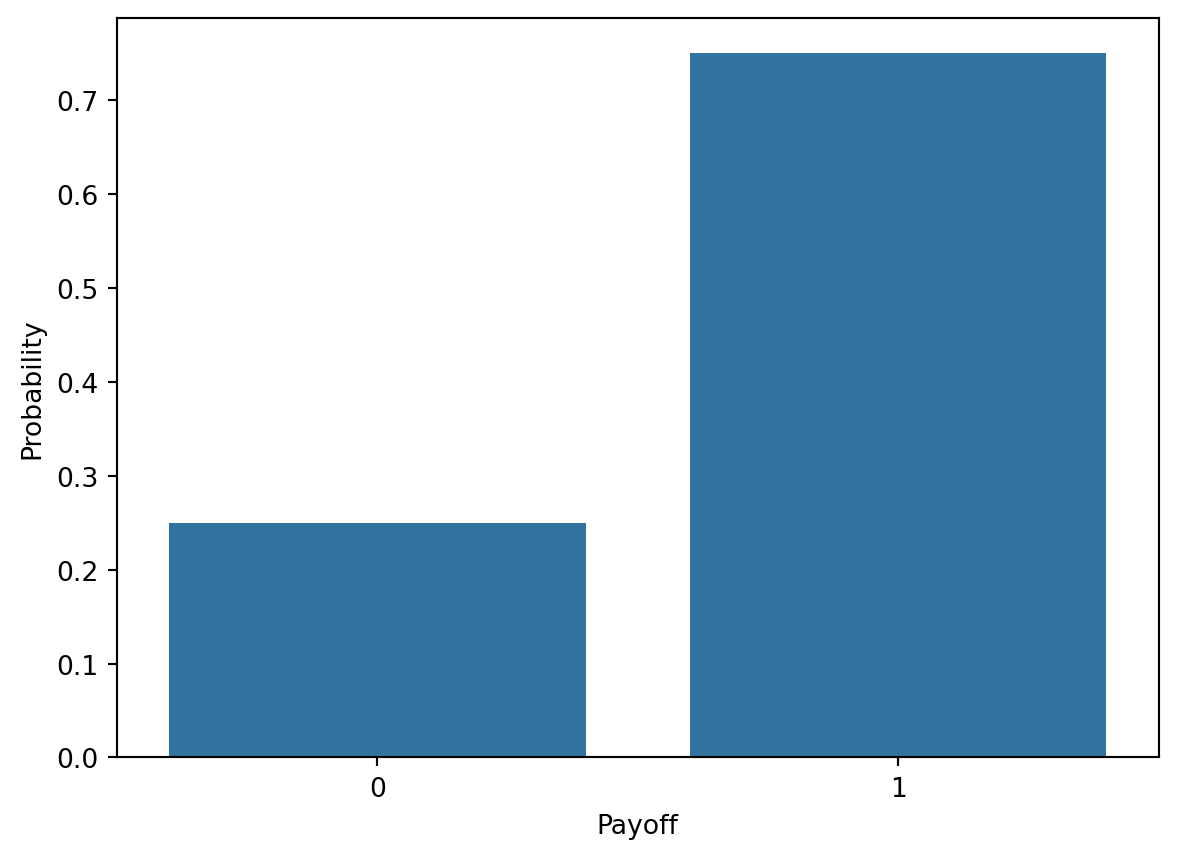

In [1]:
#| label: fig-coins-pmf-plot
#| caption: Plot of the probability mass function of the payoff of the coin game.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


sns.barplot(x=[0, 1], y=[1/4, 3/4])
plt.xlabel('Payoff')
plt.ylabel('Probability')

In [2]:
# Simulate the game


# We use 0 to represent heads and 1 to represent tails
coins_game = np.random.choice([0, 1], size=[1000, 2])
df_coins = pd.DataFrame(coins_game, columns=['toss1', 'toss2'])
df_coins.head()

,toss1,toss2
0,0,1
1,0,0
2,0,1
3,1,1
4,1,1


In [3]:
# The payoff is equal to 1 EUR if there is at least one head

df_coins["payoff"] = ((df_coins["toss1"] + df_coins["toss2"]) > 0).astype(int)
df_coins.head()

,toss1,toss2,payoff
0,0,1,1
1,0,0,0
2,0,1,1
3,1,1,1
4,1,1,1


In [4]:
# Now let's count how many times we won 1 EUR and how many times we
# were left empty-handed

df_coins["payoff"].value_counts()

payoff
1    748
0    252
Name: count, dtype: int64

In [5]:
df_coins["payoff"].value_counts(normalize=True)

payoff
1    0.748
0    0.252
Name: proportion, dtype: float64

Text(9.066666666666666, 0.5, 'Proportions')

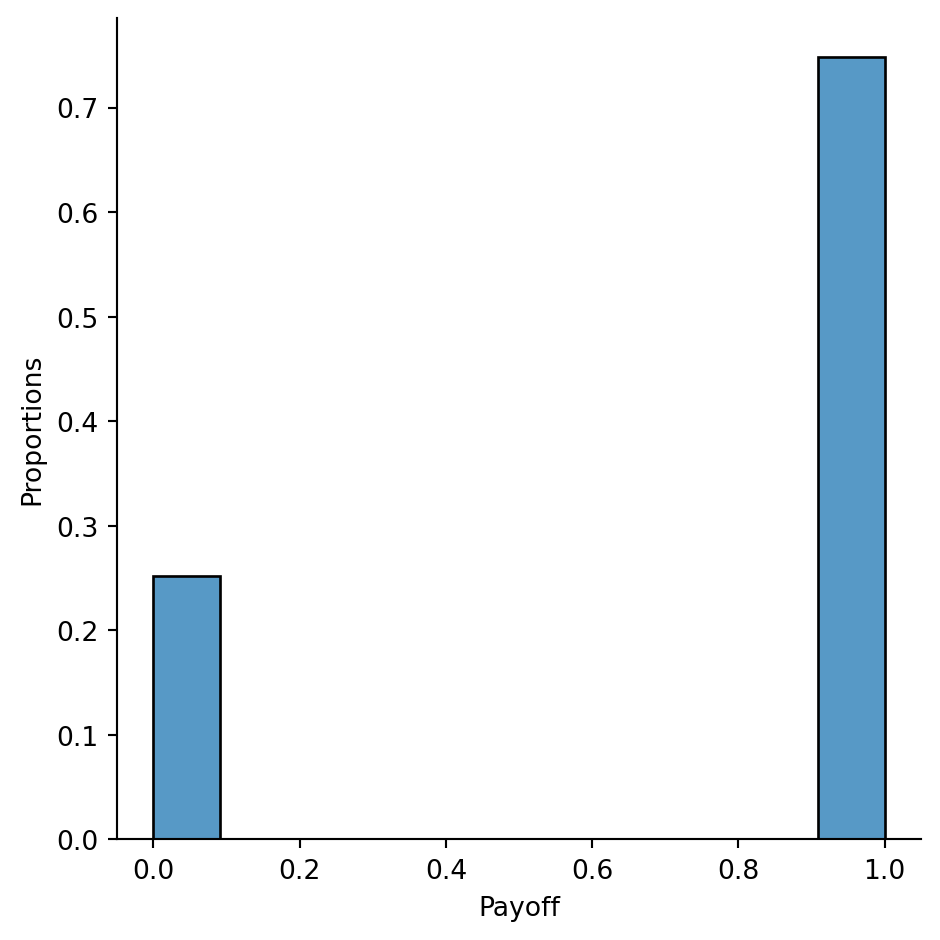

In [6]:
#| label: fig-coins-epmf-simulated
#| caption: Empirical probability mass function of the payoff of the coin game.

sns.displot(x="payoff", data=df_coins, stat='probability')

plt.xlabel('Payoff')
plt.ylabel('Proportions')

## Exercise (Probability Mass Function)

Which one of the following is not a valid probability mass function?

1. $f(x) = \frac{1}{4}$ for $x = 0, 1, 2, 3$ and $f(x) = 0$ otherwise
2. $f(x) = \frac{1}{2}$ for $x = 0, 1$ and $f(x) = -1$ otherwise
3. 

$$ f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = -1 \\
0 & \text{otherwise}
\end{cases}
$$

4. 

$$ f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = -1 \\
\frac{1}{2} & \text{if } x = 3.5 \\
0 & \text{otherwise}
\end{cases}
$$



Construct the PMF of a random variable $X$ that is the sum of the outcomes of rolling two fair four-sided dice. The sample space of the experiment is

$$
\Omega = \left\{\begin{array}{cccc}
1,1 & 1,2 & 1,3 & 1,4 \\
2,1 & 2,2 & 2,3 & 2,4 \\
3,1 & 3,2 & 3,3 & 3,4 \\
4,1 & 4,2 & 4,3 & 4,4 \\
\end{array}\right\}
$$

### Exercise: PMF

Your hobby soccer team will play 2 games this weekend and has a probability of 0.4 of not losing the first game and 0.7 of not losing the second game. If it does not lose a particular game, the team is equally likely to win or tie. The team will receive 2 points for a win, 1 for a tie, and 0 for a loss. Construct the PMF of the number of points that the team earns over the weekend. Assume that the two games are independent.


## Expected Value


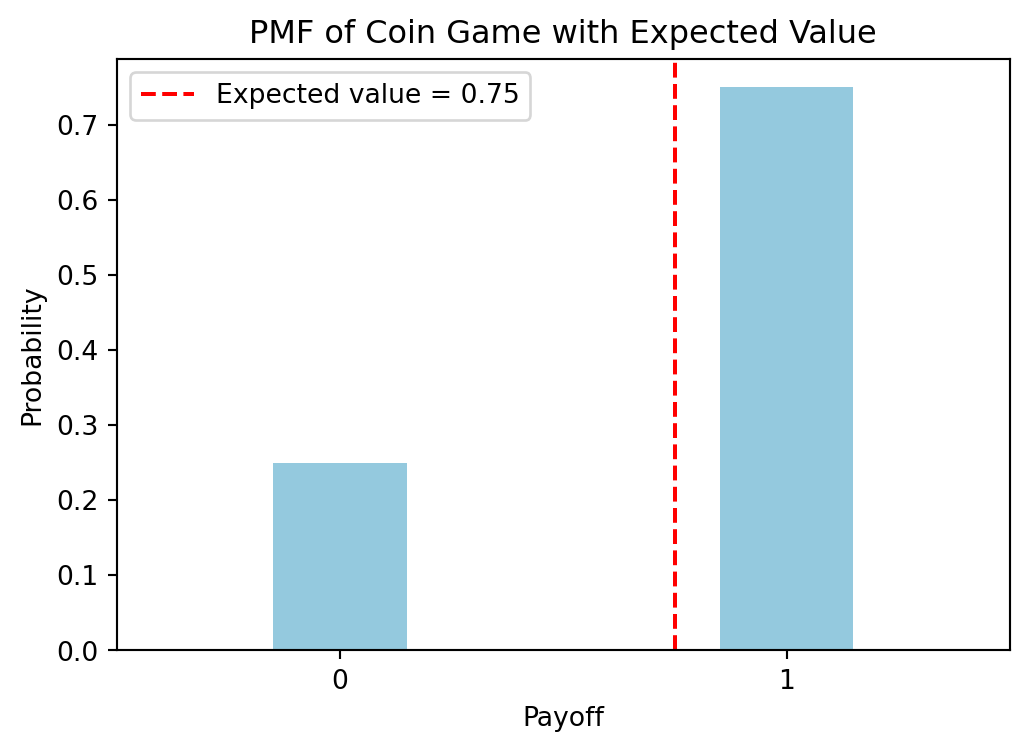

In [7]:
# Plot the expected value of the coin game in 
# a plot of the PMF using seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# PMF for the payoff in the coin game: payoff can be 1 with probability 0.75, 0 with probability 0.25
pmf = pd.DataFrame({
    'payoff': [0, 1],
    'probability': [0.25, 0.75]
})

# Compute expected value
expected_value = (pmf['payoff'] * pmf['probability']).sum()

plt.figure(figsize=(6,4))
ax = sns.barplot(x='payoff', y='probability', data=pmf, color='skyblue', width=0.3)
ax.set_ylabel('Probability')
ax.set_xlabel('Payoff')

# Add a vertical line for expected value
plt.axvline(expected_value, color='red', linestyle='--', label=f'Expected value = {expected_value:.2f}')

# Add legend
plt.legend()
plt.title('PMF of Coin Game with Expected Value')
plt.show()


## Variance


In [8]:
x2 = np.array([-1, 2.5])
p_x2 = np.array([0.5, 0.5])

# Compute the expected value of the second game

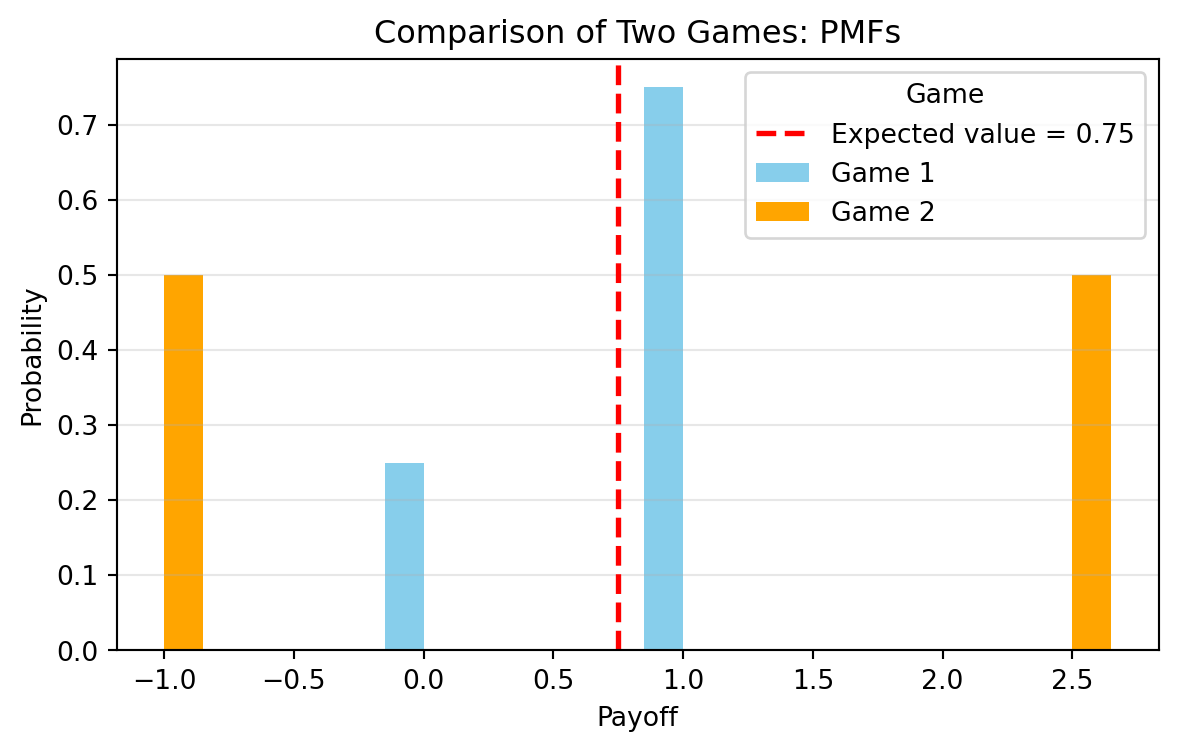

In [9]:
# Plot the first and the second PMF in the same plot

# First PMF (already defined as pmf)
pmf1 = pmf.copy()
pmf1['game'] = 'Game 1'

# Second PMF
pmf2 = pd.DataFrame({
    'payoff': [-1, 2.5],
    'probability': [0.5, 0.5],
    'game': 'Game 2'
})

expected_value_2 = (x2 * p_x2).sum()

fig, ax = plt.subplots(figsize=(7,4))

# Plot bars for each game manually with proper numeric positioning
width = 0.15
game1_data = pmf1[pmf1['game'] == 'Game 1']
game2_data = pmf2[pmf2['game'] == 'Game 2']

ax.bar(game1_data['payoff'] - width/2, game1_data['probability'], width=width, label='Game 1', color='skyblue')
ax.bar(game2_data['payoff'] + width/2, game2_data['probability'], width=width, label='Game 2', color='orange')

# Add expected value line
ax.axvline(expected_value_2, color='red', linestyle='--', linewidth=2, label=f'Expected value = {expected_value_2:.2f}')

ax.set_xlabel('Payoff')
ax.set_ylabel('Probability')
ax.set_title('Comparison of Two Games: PMFs')
ax.legend(title='Game')
ax.grid(axis='y', alpha=0.3)
plt.show()


:::{#def-variance}
## Variance

For a discrete random variable $X$ with PMF $f(x)$, the variance is defined as

$$
Var(X) = E((X - E(X))^2) = \sum_x (x - E(X))^2 f(x)
$$

The square root of the variance is called the **standard deviation**.

$$
SD(X) = \sqrt{Var(X)}
$$

:::


## Variance and Risk

The second game from the previous exercise is more risky because the payoffs are more variable. To see this, let's say 1000 persons play both games 10 times each.

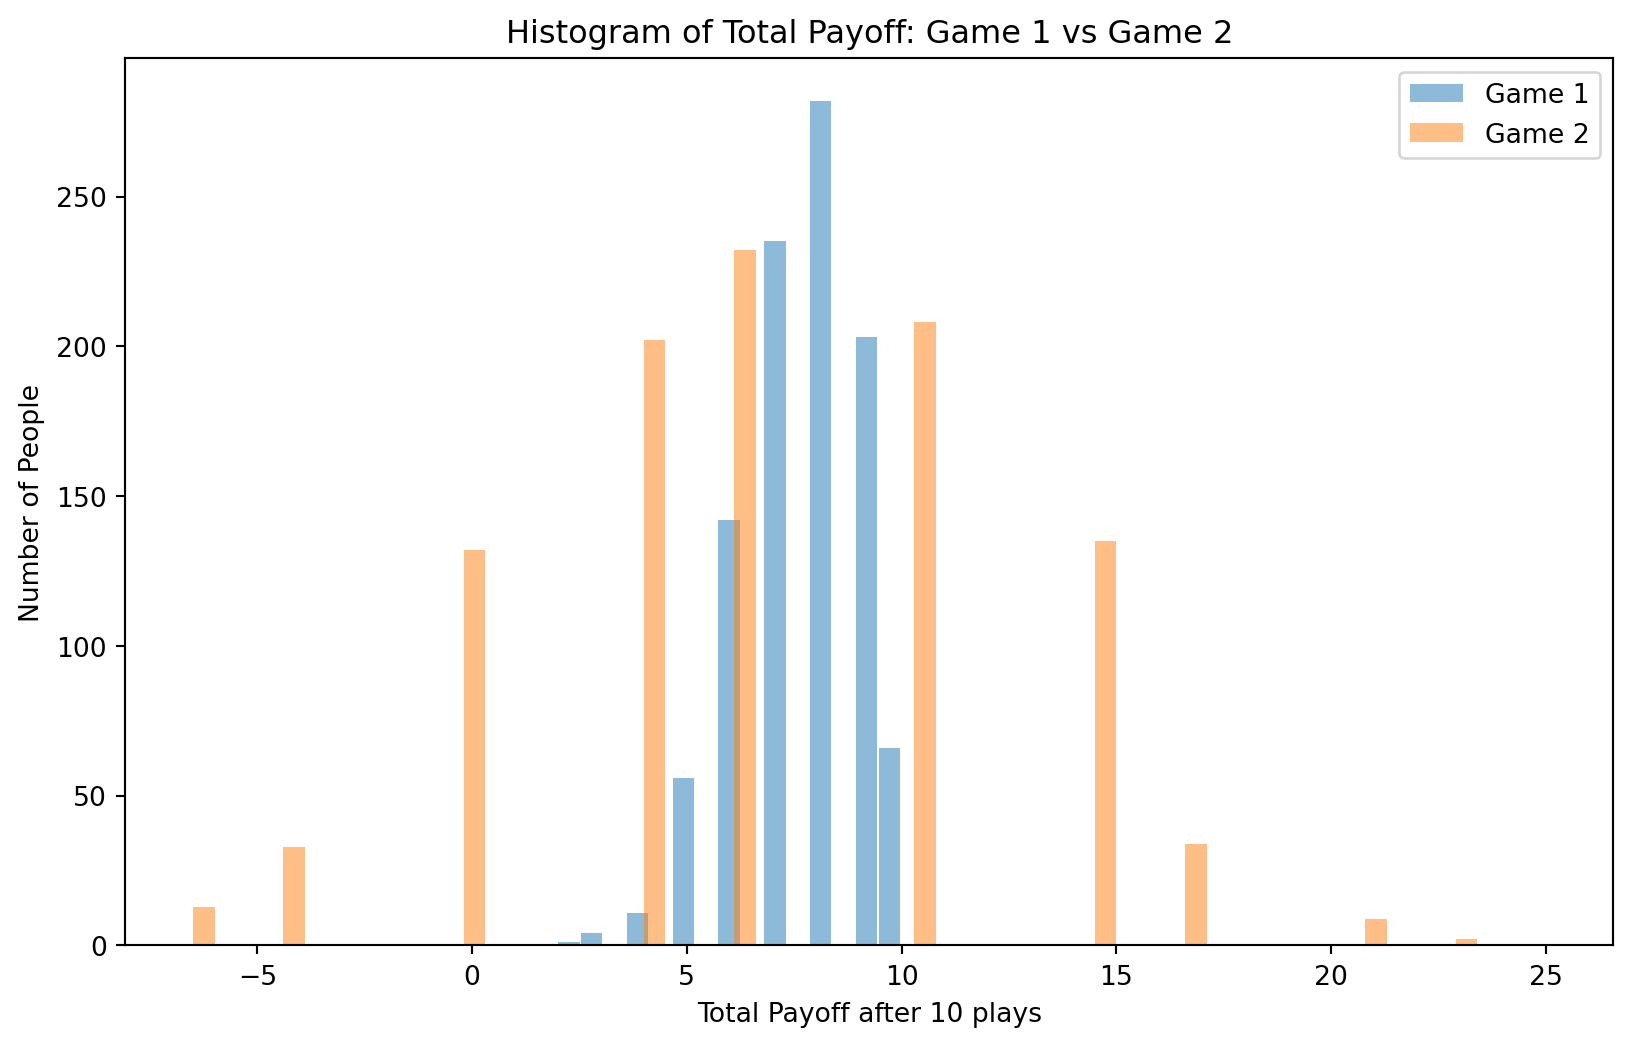

In [10]:
game_1 = np.random.choice([0, 1], size=(10, 1000), p=[0.25, 0.75])
game_2 = np.random.choice([-1, 2.5], size=(10, 1000), p=[0.5, 0.5])

df = pd.DataFrame({
    'game_1': game_1.sum(axis=0),
    'game_2': game_2.sum(axis=0)
})
df.head()

# Plot the histogram of the results
plt.figure(figsize=(10, 6))
plt.hist(df['game_1'], bins=15, alpha=0.5, label='Game 1', width=0.5)
plt.hist(df['game_2'], bins=15, alpha=0.5, label='Game 2', width=0.5)
plt.xlabel('Total Payoff after 10 plays')
plt.ylabel('Number of People')
plt.title('Histogram of Total Payoff: Game 1 vs Game 2')
plt.legend()
plt.show()


## Exercise (Variance)

1. Compute the variance and the standard deviation of both games from the previous exercise.
2. Let's say that you are pricing the ticket for both games at 1 EUR. What are your expected profits in both cases? What is the standard deviation of your profits?

## The Bernoulli Distribution

The distribution of the first game that we have examined so far is extremely important and is called the Bernoulli distribution as it is able to model situations with two possible outcomes (like success/failure, win/lose, head/tail, healthy/sick, survival/death, etc.). It is a one-parameter distribution where the parameter $p$ denotes the probability of success (e.g. winning 1 EUR, getting heads, being healthy, surviving, etc.). The PMF of a Bernoulli distributed random variable $X$ is of the same form as the PMF of our coin tossing game, only the probability of winning 1 EUR is $p$ instead of $3/4$.

:::{#def-bernoulli}
## Bernoulli Distribution

A discrete random variable $X$ is said to follow a Bernoulli distribution with parameter $p$ (denoted by $X \sim Bernoulli(p)$) if its PMF is given by

$$
f(x) = \begin{cases}
p & \text{if } x = 1 \\
1 - p & \text{if } x = 0 \\
0 & \text{otherwise}
\end{cases}
$$

:::

Exercise: Derive the expected value and the variance of a Bernoulli distributed random variable.




:::{#exr-pmf-binomial-1}
## The Binomial Distribution (1)

Consider an experiment where you toss a coin $3$ times independently. Write down the sample space $\Omega$ as a set of sequences (e.g., $HHH$ for three heads). Let $X$ be the random variable that counts the number of heads in the sequence. Write down the PMF of $X$.

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The sample space is

$$
\Omega = \left\{\begin{array}{cccc}
    HHH & HHT & HTH & HTT \\
    THH & THT & TTH & TTT \\
\end{array}\right\}
$$

and has $2^3 = 8$ elements. The random variable $X$ is defined as the number of heads in the sequence. Under a probability model of equally likely outcomes the PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{8} & \text{if } x = 0 \\
\frac{3}{8} & \text{if } x = 1 \\
\frac{3}{8} & \text{if } x = 2 \\
\frac{1}{8} & \text{if } x = 3 \\
0 & \text{otherwise}
\end{cases}
$$

:::



Consider an experiment where you toss a coin four times independently. The sample space consists of all sequences of length four with heads and tails. There are $2^4 = 16$ elements in the sample space.

$$
\Omega = \left\{\begin{array}{llll}
HHHH & HHHT & HHTH & HHTT \\
HTHH & HTHT & HTTH & HTTT \\
THHH & THHT & THTH & THTT \\
TTHH & TTHT & TTTH & TTTT
\end{array}\right\}
$$

Consider a function $X$ that maps each element of the sample space to the real numbers. For example, let $X$ be the function that counts the number of heads in each outcome (a sequence of four coin tosses). The possible values of $X$ are $0, 1, 2, 3, 4$.
What is the probability that $X = 0, X = 1, X = 2, X = 3,$ or $X = 4$?

$X = 0$ if the outcome is TTTT. There is only one such outcome and so the probability is $1/16$.

$$
P(X = 0) = P(\{TTTT\}) = \frac{1}{16} \\
P(X = 1) = P(\{HTTT, THTT, TTHT, TTTH\}) = \frac{4}{16} \\
P(X = 2) = P(\{HHTT, HTHT, HTTH, THHT, THTH, TTHH\}) = \frac{6}{16} \\
P(X = 3) = P(\{HHHT, HHTH, HTHH, THHH\}) = \frac{4}{16} \\
P(X = 4) = P(\{HHHH\}) = \frac{1}{16}
$$

In the following we fill call functions like $X$ that map outcomes of an experiment to real numbers **random variables**. When the number of possible outcomes of the experiment is finite or countably infinite, we call the random variable **discrete**. We will talk about continuous random variables later in the course.


:::{#exr-pmf-binomial}
## The Binomial Distribution

In this exercise we will again consider a coin tossing experiment where you toss a coin $n$ times independently, but this time the coin will not be fair. Instead the probability of getting a head is $p$ and the probability of getting a tail is $1 - p$. Write down the PMF of the random variable $X$ that counts the number of heads in each sequence.

:::

Text(0, 0.5, 'Probability')

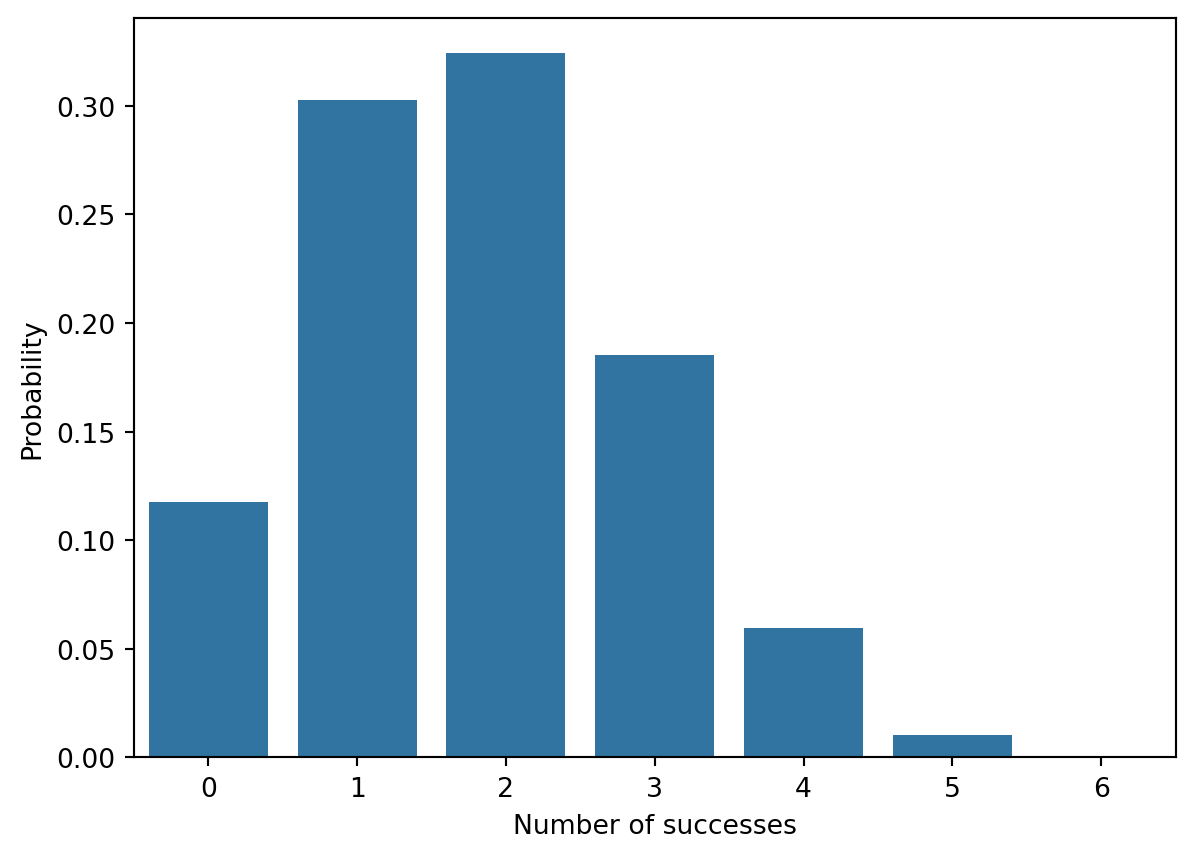

In [11]:
#| label: fig-binomial-pmf-plot
#| fig-cap: Plot of the probability mass function of the binomial distribution with parameters n=6 and p=0.3.
import numpy as np
from scipy.stats import binom

x = np.arange(0, 7)
y = binom.pmf(x, n=6, p=0.3)

sns.barplot(x=x, y=y)
plt.xlabel('Number of successes')
plt.ylabel('Probability')


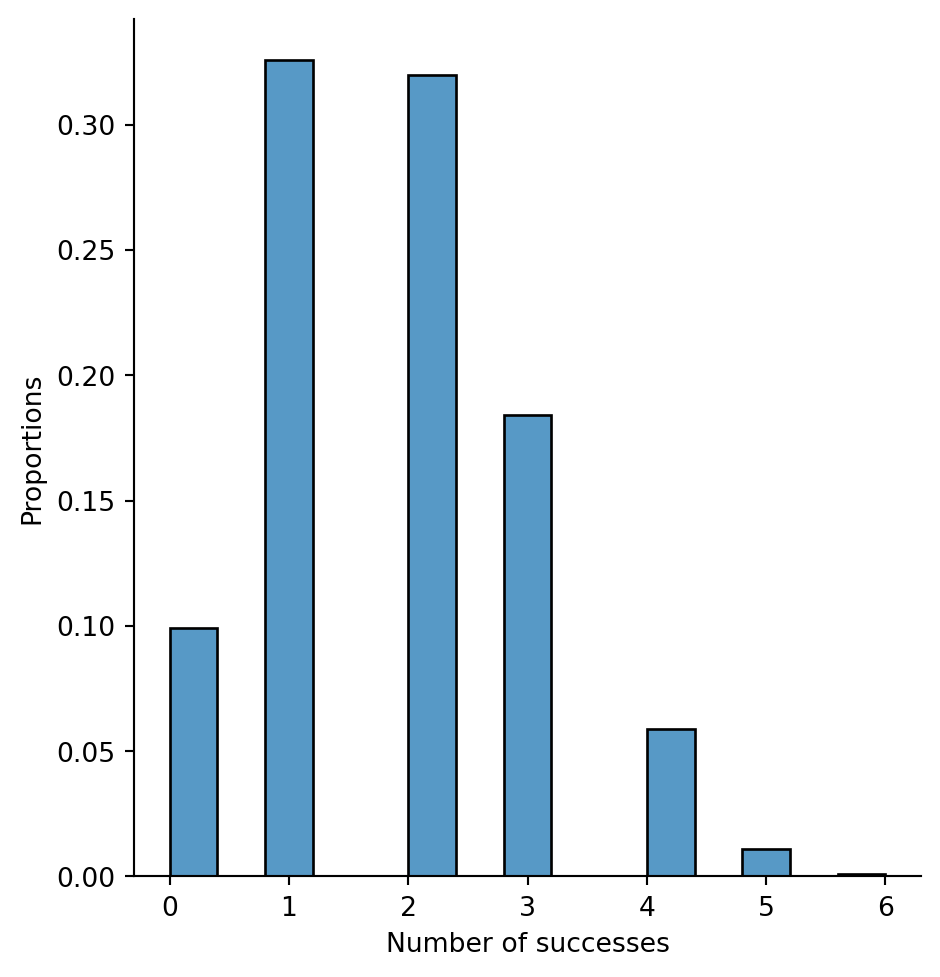

In [12]:
#| label: fig-binomial-epmf-simulated
#| caption: Empirical probability mass function of the binomial distribution with parameters n=6 and p=0.3.

# Simulate the binomial distribution with n=6 and p=0.3

binomial = np.random.binomial(n=6, p=0.3, size=1000)

sns.displot(x=binomial, stat='probability')
plt.xlabel('Number of successes')
plt.ylabel('Proportions')
plt.show()


## Exercises

1. A birthday problem, again: you go to a party with 30 other people. Assume that birthdays are uniformly distributed over 365 days and independent between people. What is the probability

- Exactly one other person has the same birthday as you?
- No other person has the same birthday as you?
- At least one other person has the same birthday as you?

## Cumulative Distribution Function

The probability mass function (PMF) of a random variable $X$ gives the probability of each possible value of $X$. The cumulative distribution function (CDF) of $X$ gives the probability that $X$ is less than or equal to a given value $x$.

:::{#def-cdf}
## Cumulative Distribution Function

For a discrete random variable $X$, the cumulative distribution function (CDF) is defined as

$$
F(x) = P(X \leq x) = \sum_{y \leq x} f(y)
$$

where $f(y)$ is the PMF of $X$ and the sum runs over all possible values of $y$ that are less than or equal to $x$.

:::

:::{#exr-cdf}
## Properties of the CDF

Consider a discrete random variable $X$ with PMF $f(x)$ and CDF $F(x)$. Show that the CDF satisfies the following properties:

1. $F(x)$ is non-decreasing.
2. $F(x) \in [0, 1]$ for all $x$.
3. $\lim_{x \to -\infty} F(x) = 0$ and $\lim_{x \to \infty} F(x) = 1$.
4. $P(a < X \leq b) = F(b) - F(a)$ for all $a < b$.
5. $P(X = a) = F(a) - F(a - 1)$ for all $a$.
:::

:::{#exr-cdf-coins}
## CDF of the Coin Tossing Game

Consider our introductory example of the coin tossing game where you win 2 EUR for every head. Write down the CDF of the random variable $X$ that counts the amount of money you win and use it to calculate the following probabilities:

1. The probability of winning between 1.5 and 3 EUR (inclusive).
2. The probability to win more than 2.5 EUR.
3. The probability of winning between 2 and 6 EUR (inclusive).

:::

:::{.callout-note collapse="true"}
## Solution (click to expand)

The PMF of $X$ is

$$
f(x) = \begin{cases}
\frac{1}{4} & \text{if } x = 0 \\
\frac{1}{2} & \text{if } x = 2 \\
\frac{1}{4} & \text{if } x = 4 \\
0 & \text{otherwise}
\end{cases}
$$

The CDF of $X$ is

$$
F(x) = \sum_{y \leq x} f(y)
$$

$$
F(x) = \begin{cases}
0 & \text{if } x < 0 \\
\frac{1}{4} & \text{if } 0 \leq x < 2 \\
\frac{3}{4} & \text{if } 2 \leq x < 4 \\
1 & \text{if } x \geq 4
\end{cases}
$$

The probability of winning between 1.5 and 3 EUR is

$$
P(1.5 \leq X \leq 3) = F(3) - F(1.5) + P(X = 1.5) = \frac{3}{4} - \frac{1}{4} + 0 = \frac{1}{2}
$$

The probability of winning more than 2.5 EUR is

$$
P(X > 2.5) = 1 - P(X \leq 2.5) = 1 - F(2.5) = 1 - \frac{3}{4} = \frac{1}{4}
$$

The probability of winning between 2 and 6 EUR is

$$
P(2 \leq X \leq 6) = F(6) - F(2) + P(X = 2) = 1 - \frac{3}{4} + 0 = \frac{1}{4}
$$


:::

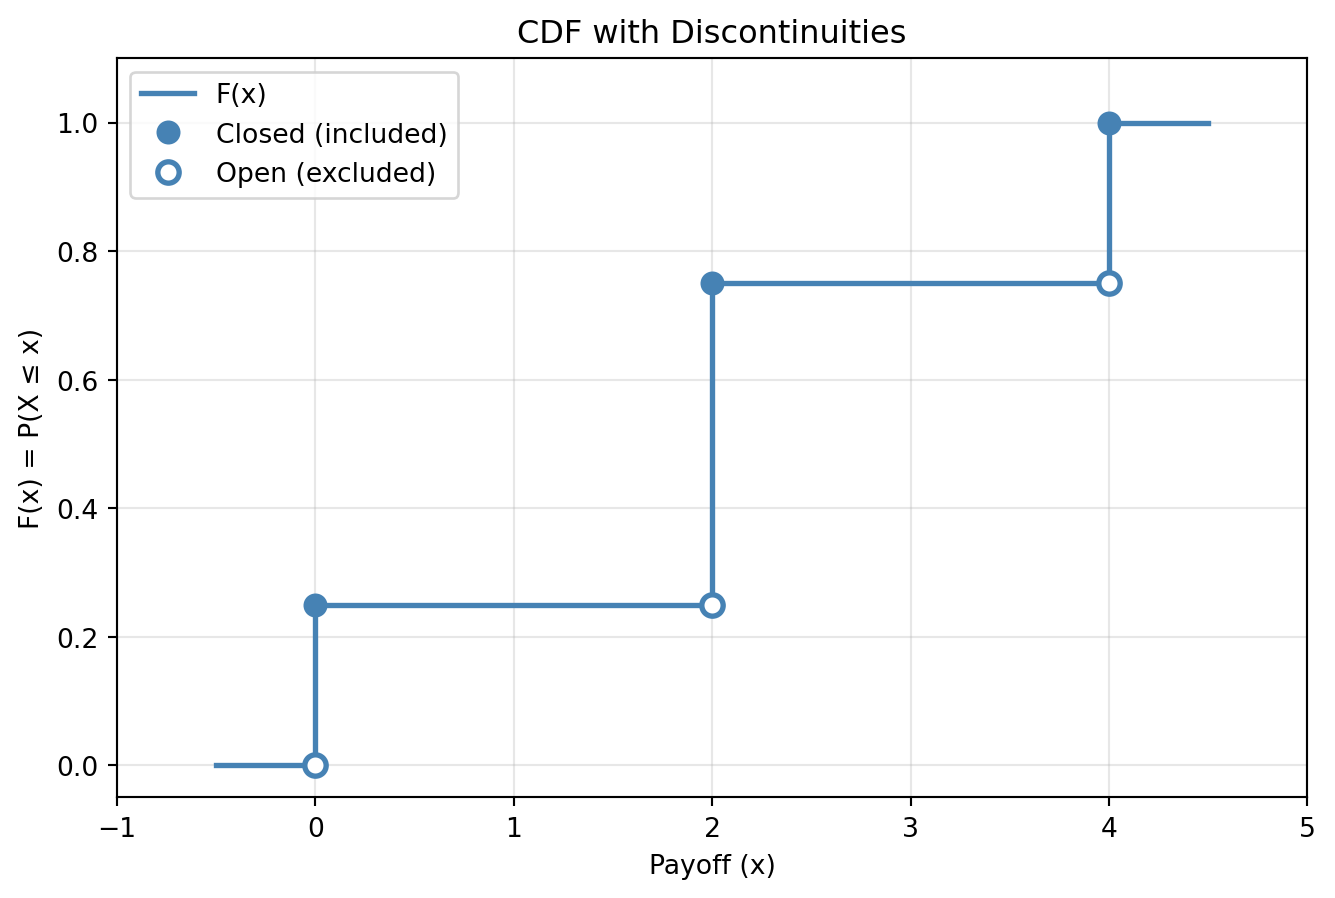

In [13]:
#| label: fig-coins-cdf-plot
#| fig-cap: Plot of the cumulative distribution function of the payoff of the coin game.

# Define CDF values - the CDF jumps at each payoff value
x_values = [-0.5, 0, 2, 4, 4.5]  # Extended range for visualization
cdf_values = [0, 0.25, 0.75, 1.0, 1.0]

plt.figure(figsize=(8, 5))

# Plot step function (right-continuous, as CDFs should be)
plt.step(x_values, cdf_values, where='post', linewidth=2, color='steelblue', label='F(x)')

# Add filled markers at the start of each step (closed intervals)
jump_points_x = [0, 2, 4]
jump_points_y = [0.25, 0.75, 1.0]
plt.plot(jump_points_x, jump_points_y, 'o', markersize=8, label='Closed (included)', color='steelblue')

# Add empty markers at the end of each step (open intervals)
end_points_x = [0, 2, 4]
end_points_y = [0, 0.25, 0.75]
plt.plot(end_points_x, end_points_y, 'wo', markeredgecolor='steelblue', 
         markersize=8, markeredgewidth=2, label='Open (excluded)')

plt.xlabel('Payoff (x)')
plt.ylabel('F(x) = P(X ≤ x)')
plt.title('CDF with Discontinuities')
plt.grid(True, alpha=0.3)
plt.ylim(-0.05, 1.1)
plt.xlim(-1, 5)
plt.legend()


## Exercises

The statistical modeling of waiting times (e.g. number of hours or weeks until some event occurs) forms an important part of the applied work in statistics. Consider some examples:

- The number of days until a customer makes a purchase.
- The number of weeks until a machine breaks down.
- The number of hours until a light bulb burns out.

Assuming that these events may occur in every period with a fixed probability and assuming independence between the periods, all of these examples  

:::{#exr-geometric-distribution}
## Coin Tossing until the First Head

You toss a biased coin with probability of getting a head $p$. Assume that the tosses are independent. The random variable $X$ counts the number of tosses until the first head. Write down the PMF and CDF of $X$. Compute the following probabilities:

- The probability of getting a head on the first toss.
- The probability of waiting at least 3 tosses until the first head (for $p = 0.2$).
- The probability of waiting between 2 and 4 tosses until the first head (for $p = 0.2$).

:::

:::{.callout-note collapse="true"}
## Hint: Geometric Series (click to expand)

In the derivation of the CDF you will need an expression for the partial sum of a geometric series. The sum of the first $n$ terms of a geometric series is:

$$
\sum_{k = 0}^{n} r^k = \frac{1 - r^{n + 1}}{1 - r}, \quad r \neq 1
$$

where $r$ is the common ratio of the series. In this case, the common ratio is $1 - p$.

It is easy to show why the above equation holds:

$$
\begin{align*}
S_n &= 1 + r + r^2 + \ldots + r^{n - 1} + r^{n} \\
rS_n &= r + r^2 + \ldots + r^{n} + r^{n + 1} \\
\end{align*}
$$

Subtracting the second equation from the first gives

$$
S_n - rS_n = 1 - r^{n + 1} \Rightarrow S_n = \frac{1 - r^{n + 1}}{1 - r}
$$

:::

In [14]:
# Check it with numpy

pwr = np.array([0, 1, 2, 3, 4, 5])
series = 0.5 ** pwr
series

array([1.     , 0.5    , 0.25   , 0.125  , 0.0625 , 0.03125])

In [15]:
# Look at the partial sums

np.cumsum(series)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

In [16]:
# Compare these to the result obtained using the formula

(1 - 0.5 ** (pwr + 1)) / (1 - 0.5)

array([1.     , 1.5    , 1.75   , 1.875  , 1.9375 , 1.96875])

:::{#exr-bulb-burnout}
## Light Bulb Burnout

A firm produces light bulbs that burn out after a random number of months. The firm offers a warranty for their products, so it is interested in the distribution of the number of months until a bulb burns out, because this will determine the number of replacements it has to provide. The analytics department of the firm has estimated that each bulb is likely to burn out with a probability of 0.02 in each month and that the burnout of each bulb is independent of the other bulbs and between months.

What is the probability that a bulb burns out after the third month?
:::

:::{#exr-rare-events}
## The Number of Rare Events

Show that the following function is a valid PMF for a discrete random variable $X$ with values in the set $\{0, 1, 2, \ldots\}$ and parameter $\lambda > 0$:

$$
f(k) = \frac{e^{-\lambda} \lambda^k}{k!}, \quad k = 0, 1, 2, \ldots
$$

Use $\lambda = 2$ and compute the probabilities of $X$ taking the values 0 and 2.

:::

:::{.callout-note collapse="true"}
## Hint (click to expand)

Use the fact that 

$$
e^{\lambda} = \frac{\lambda^{0}}{0!} + \frac{\lambda^{1}}{1!} + \frac{\lambda^{2}}{2!} + \frac{\lambda^{3}}{3!} + \ldots
$$

:::

### Exercise 1 (Expected Value - Game Strategy)

In a game similar to "Who Wants to Be a Millionaire?", a contestant is asked a series of multiple-choice questions. For simplicity we will limit the number of questions to two. Furthermore, the participant has a 70% chance of answering question A correctly and a 50% chance of answering question B. The rewards are 100 USD for a correct answer to question A and 300 USD for a correct answer to question B. Assume that the answers to the two questions are independent. If the contestant gives a wrong answer to any of the questions, the game ends immediately and no further questions are asked. The participant keeps the money won up to that point. The contestant can choose the order in which to answer the questions. What is the optimal order to maximize the expected winnings?



### Exercise (CDF)

You are allowed to take a test three times. On each attempt, you are equally likely to score any integer number of points between 1 and 10 (inclusive). Your final score is the maximum score you achieved on any of the three attempts. What is the PMF of your final score?




### Exercise (Binomial)

You offer the following game to the public. A participant tosses a fair coin four times (independently) and you pay 1 EUR
for every toss that results in a head. 

- What price would you set for the ticket?
- What price would you set if the coin is loaded and turns head only 20 percent of the time?

$$
\Omega = \left\{\begin{array}{llll}
HHHH & HHHT & HHTH & HHTT \\
HTHH & HTHT & HTTH & HTTT \\
THHH & THHT & THTH & THTT \\
TTHH & TTHT & TTTH & TTTT
\end{array}\right\}
$$

## Exercise

A company has 50 employees working in its call center serving a total of 1000 customers. At any given time
   a customer has a 0.01 probability of calling the call center and the customers act independently.

   - What is the PMF of the number of busy employees at a given time?
   - What is the probability that there are more customers calling than employees available to serve them?
   - What is the expected number of busy employees at a given time?

Furthermore, use the following approximation to calculate the probabilities:

$$
P(X = k) = \frac{\lambda^k}{k!} e^{-\lambda}
$$

where $\lambda = n \cdot p$


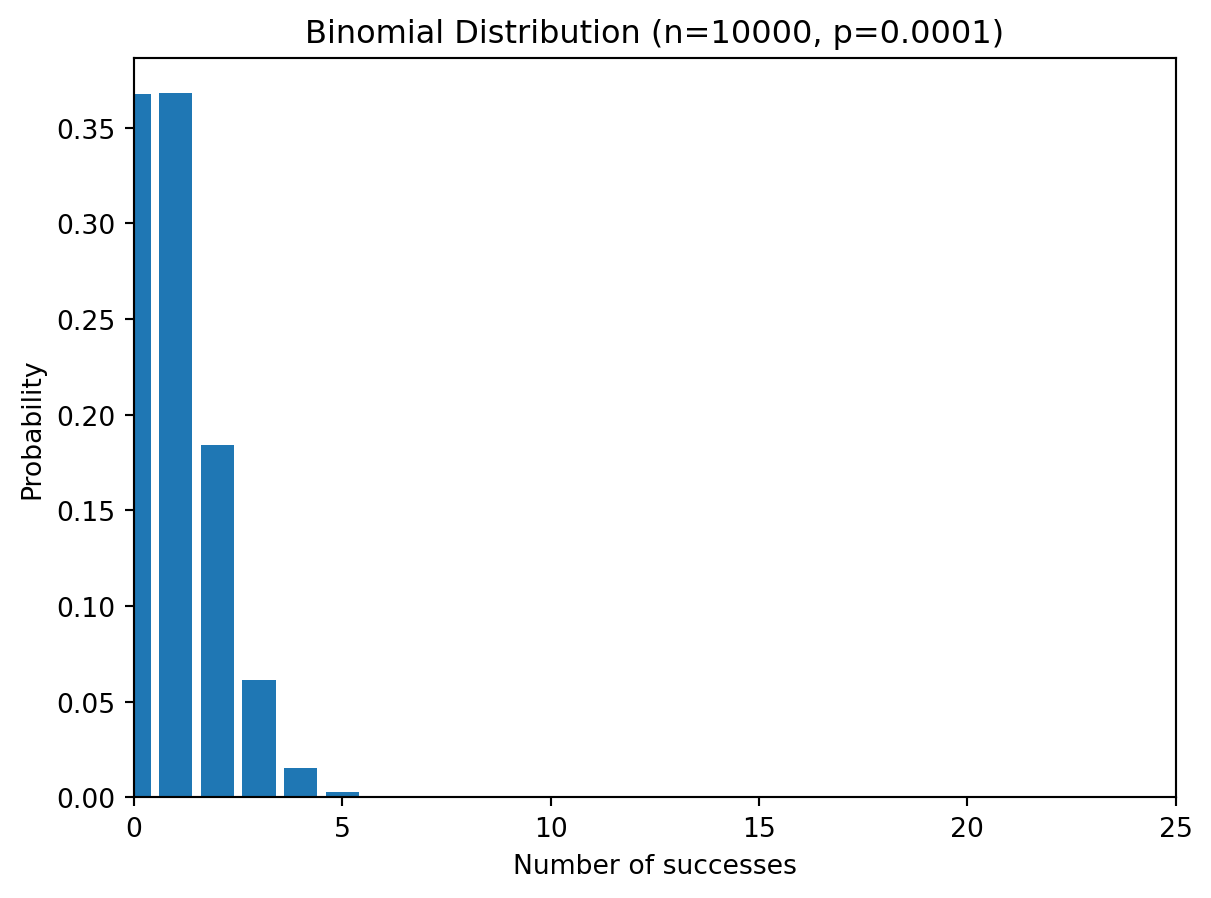

In [18]:
# Plot the binomial distribution for n=10 and p=0.5

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

n = 10000
p = 0.0001

x = np.arange(0, n+1)
pmf = binom.pmf(x, n, p)
plt.bar(x, pmf)
plt.xlabel('Number of successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.xlim(0, 25)  # Limit x-axis for better visualization
plt.show()

In [19]:
# Compute the PMF and the CDF of a binomial distribution
from scipy.stats import binom

prob_all_employed = 1 - binom.cdf(2, n, p)

print("CDF:", prob_all_employed)

CDF: 0.08029219924224273


1.0


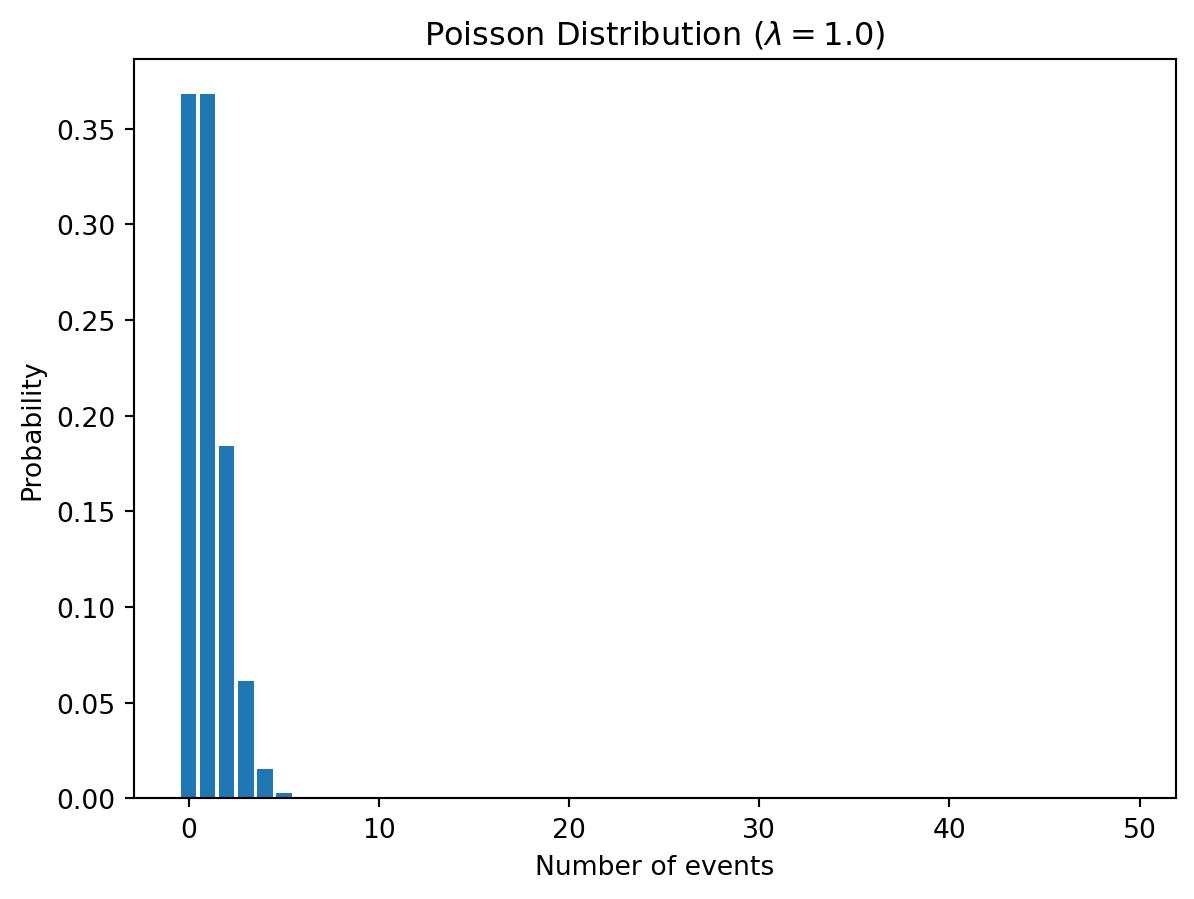

In [20]:
# Plot the Poisson distribution with lambda=n * p

from scipy.stats import poisson

lambda_ = n * p
print(lambda_)

x = np.arange(0, 50)
pmf = poisson.pmf(x, lambda_)
plt.bar(x, pmf)
plt.xlabel('Number of events')
plt.ylabel('Probability')
plt.title(rf'Poisson Distribution $(\lambda={n*p})$')
plt.show()

In [21]:
# Compute the poisson PMF and CDF

from scipy.stats import poisson

cdf_poisson = 1 - poisson.cdf(2, lambda_)

print("CDF:", cdf_poisson.round(2))

CDF: 0.08




### Exercise 2 (St. Petersburg Paradox)

You are offered to play the following game: A fair coin is tossed repeatedly until it comes up heads. If the first head appears on the n-th toss, you win $2^n$ EUR. How much would you be willing to pay to play this game?
